In [79]:
%%time
import pyodbc 
import pandas as pd
import numpy as np
import datetime
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import timeit

warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None)
#!pip install jupyter_contrib_nbextensions
import squarify



Wall time: 9.97 ms


In [49]:
%%time
cnxn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                      "Server=LAPTOP-CU20T8L1;"
                      "Database=CAMPAIGN_DB2;"
                      "Trusted_Connection=yes;")


cursor = cnxn.cursor()
sql1 = pd.read_sql_query('SELECT [Bet Time] , [Provider] ,[Product Type] ,[Game Group], [Game], [Player ID],[Stake], [Valid Bet], [Win/Loss],[Real Name], [Registered Date],[Last Login] ,[GROUP] FROM CAMPAIGN_TBL_FINAL ',cnxn)
df1 = pd.DataFrame(sql1)

Wall time: 86.8 ms


In [53]:
%%time
cnxn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                      "Server=LAPTOP-CU20T8L1;"
                      "Database=CAMPAIGN_DB;"
                      "Trusted_Connection=yes;")


cursor = cnxn.cursor()
sql2 = pd.read_sql_query('SELECT TOP(100) [Bet Time] , [Provider] ,[Product Type] ,[Game Group], [Game], [Player ID],[Stake], [Valid Bet], [Win/Loss],[Real Name], [Registered Date],[Last Login] ,[GROUP] FROM CAMPAIGN_TBL_FINAL',cnxn)
df2 = pd.DataFrame(sql2)

Wall time: 63.8 ms


In [54]:
%%time
df = pd.concat([df1,df2])
df.drop_duplicates() #dropping duplicates if any

Wall time: 58.8 ms


,Bet Time,Provider,Product Type,Game Group,Game,Player ID,Stake,Valid Bet,Win/Loss,Real Name,Registered Date,Last Login,GROUP
0,2020-03-04 08:52:58,MG,EGAME,SLOTGAME,Lara Croft Temples and Tombs,ja2637,2.8,2.8,-2.80,จิระเมศร์ ถาลี,2019-10-17 16:43:41,2020-04-22 15:33:41,EGAME ...
1,2020-03-04 08:53:01,MG,EGAME,SLOTGAME,Lara Croft Temples and Tombs,ja2637,2.8,2.8,11.20,จิระเมศร์ ถาลี,2019-10-17 16:43:41,2020-04-22 15:33:41,EGAME ...
2,2020-03-04 08:53:05,MG,EGAME,SLOTGAME,Lara Croft Temples and Tombs,ja2637,2.8,2.8,-1.68,จิระเมศร์ ถาลี,2019-10-17 16:43:41,2020-04-22 15:33:41,EGAME ...
3,2020-03-04 08:53:08,MG,EGAME,SLOTGAME,Lara Croft Temples and Tombs,ja2637,2.8,2.8,0.28,จิระเมศร์ ถาลี,2019-10-17 16:43:41,2020-04-22 15:33:41,EGAME ...
4,2020-03-04 08:53:11,VT,EGAME,SLOTGAME,50 Lions,kiss1234,7.5,7.5,36.00,ศุภชัย ณ นคร,2019-03-10 13:04:23,2020-05-26 12:54:26,EGAME ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,2019-09-11 05:44:01,MX,LIVE,BACCARAT,Baccarat,kornzarpg,150.0,150.0,150.00,สุริยันต์ ทิพย์อักษร,2018-08-21 19:24:14,2020-05-26 15:34:05,LIVE GAME ...
95,2019-09-11 05:44:01,MX,LIVE,BACCARAT,Baccarat,kornzarpg,10.0,10.0,-10.00,สุริยันต์ ทิพย์อักษร,2018-08-21 19:24:14,2020-05-26 15:34:05,LIVE GAME ...
97,2019-09-11 05:44:01,MX,LIVE,BACCARAT,Baccarat,kornzarpg,30.0,30.0,-30.00,สุริยันต์ ทิพย์อักษร,2018-08-21 19:24:14,2020-05-26 15:34:05,LIVE GAME ...
98,2019-09-11 05:44:02,RT,EGAME,SLOTGAME,Chinese Treasures,nuttawut1995,1.0,1.0,-1.00,ณัฐวุฒิ เก่งมาก,2019-09-11 03:20:17,2019-09-11 03:37:24,EGAME ...


In [55]:
df.shape

(200, 13)

In [56]:
df.columns

Index(['Bet Time', 'Provider', 'Product Type', 'Game Group', 'Game',
       'Player ID', 'Stake', 'Valid Bet', 'Win/Loss', 'Real Name',
       'Registered Date', 'Last Login', 'GROUP'],
      dtype='object')

In [57]:
%%time
df['Bet Time'] = pd.to_datetime(df['Bet Time'])
df['Registered Date'] = pd.to_datetime(df['Registered Date'])
df['Last Login'] = pd.to_datetime(df['Last Login'])

df['Transaction Date'] = df['Bet Time'].dt.date

 
last_betting_date = df.groupby(['Player ID'])['Bet Time'].agg(['max']).reset_index().rename(columns={"max":"Last Betting Date"})


bet_df = df.groupby('Player ID').agg(Total_Stake=pd.NamedAgg(column='Stake', aggfunc='sum'),
                                      Total_Bets=pd.NamedAgg(column='Stake', aggfunc='count')).reset_index()

bet_df.columns = ['Player ID','Total Stake','Total Bets']



dataframes = [bet_df,last_betting_date]
final_temp_df = reduce(lambda left, right: pd.merge(left, right, on='Player ID', how='left'), dataframes)

final_temp_df['days_since_last_bet'] = (final_temp_df['Last Betting Date'].max() - final_temp_df['Last Betting Date']).astype('timedelta64[D]')


Wall time: 31.9 ms


# RFM MODELLING

Recency (R): Who have purchased recently? Number of days since last purchase (least recency)

Frequency (F): Who has purchased frequently? It means the total number of purchases. ( high frequency)

Monetary Value(M): Who have high purchase amount? It means the total money customer spent (high monetary value)

In [58]:
final_temp_df.head()

,Player ID,Total Stake,Total Bets,Last Betting Date,days_since_last_bet
0,au4k999,10.0,10,2019-09-11 05:43:59,175.0
1,beetaken,35.0,7,2019-09-11 05:44:00,175.0
2,goy2518,8.0,8,2019-09-11 05:44:01,175.0
3,heng6565,61.0,3,2019-09-11 05:43:56,175.0
4,ja2637,173.2,55,2020-03-04 08:56:04,0.0


In [59]:
%%time
rfm_df = final_temp_df[['Player ID', 'days_since_last_bet','Total Bets','Total Stake']]
rfm_df.columns = ['CustomerID','Recency','Frequency','Monetary']

Wall time: 1.99 ms


In [60]:
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,au4k999,175.0,10,10.0
1,beetaken,175.0,7,35.0
2,goy2518,175.0,8,8.0
3,heng6565,175.0,3,61.0
4,ja2637,0.0,55,173.2


In [61]:
CustomerID ='0619393970' # has  R59.0 F572 M1660.40 for checking

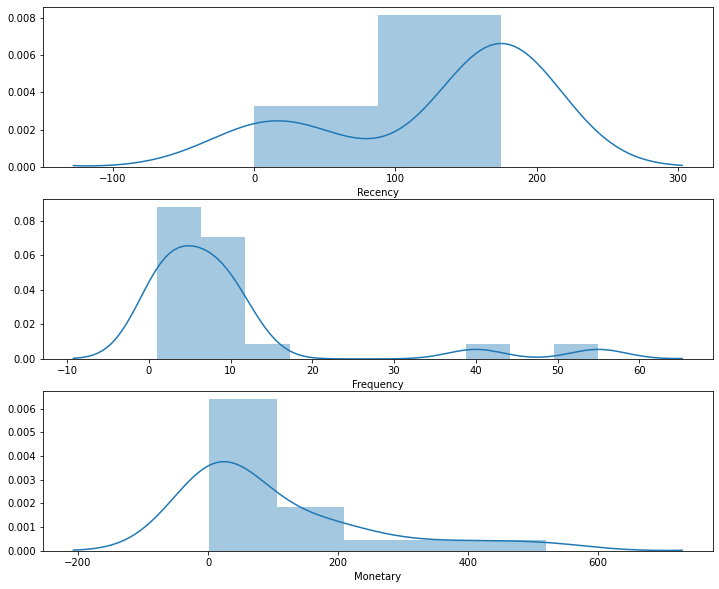

In [71]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(rfm_df['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(rfm_df['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(rfm_df['Monetary'])
# Show the plot
plt.show()

In [62]:
%%time
rfm_df['RecencyScore'] = pd.qcut(rfm_df['Recency'].rank(method="first"),5,labels=[5,4,3,2,1])
rfm_df['FrequencyScore'] = pd.qcut(rfm_df['Frequency'].rank(method="first"),5,labels=[1,2,3,4,5])
rfm_df['MonetaryScore'] = pd.qcut(rfm_df['Monetary'].rank(method="first"),5,labels=[1,2,3,4,5])
rfm_df.head()

Wall time: 15 ms


,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
0,au4k999,175.0,10,10.0,4,4,1
1,beetaken,175.0,7,35.0,4,3,3
2,goy2518,175.0,8,8.0,4,3,1
3,heng6565,175.0,3,61.0,3,2,3
4,ja2637,0.0,55,173.2,5,5,4


In [63]:
(rfm_df['RecencyScore'].astype(str) + 
 rfm_df['FrequencyScore'].astype(str) + 
 rfm_df['MonetaryScore'].astype(str)).head()

0    441
1    433
2    431
3    323
4    554
dtype: object

In [64]:
%%time
rfm_df["RFM_SCORE"] = rfm_df['RecencyScore'].astype(str) + rfm_df['FrequencyScore'].astype(str) + rfm_df['MonetaryScore'].astype(str)

Wall time: 3.99 ms


In [65]:
rfm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,21.0,129.571429,74.122582,0.0,32.0,175.0,175.0,175.0
Frequency,21.0,9.523810,13.332738,1.0,2.0,7.0,10.0,55.0
Monetary,21.0,105.149524,146.952004,1.8,10.0,23.0,173.2,520.0


In [66]:
rfm_df[rfm_df["RFM_SCORE"] == "555"].head()

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
6,kiss1234,0.0,40,300.0,5,5,5,555


In [67]:
rfm_df[rfm_df["RFM_SCORE"] == "111"].head()

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE


In [68]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Lose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [76]:
%%time
rfm_df['Segment'] = rfm_df['RecencyScore'].astype(str) + rfm_df['FrequencyScore'].astype(str)
rfm_df['Segment'] = rfm_df['Segment'].replace(seg_map, regex=True)

df.groupby('Player ID').agg(Total_Stake=pd.NamedAgg(column='Stake', aggfunc='sum'),
                                      Total_Bets=pd.NamedAgg(column='Stake', aggfunc='count')).reset_index()
rfm_agg=rfm_df[["Segment", "Recency","Frequency","Monetary"]].groupby("Segment").agg(
    RecencyMean=pd.NamedAgg(column='Recency', aggfunc='sum'),
    FrequencyMean=pd.NamedAgg(column='Frequency', aggfunc='count'),
    MonetaryMean=pd.NamedAgg(column='Monetary', aggfunc='count'),
    Count=pd.NamedAgg(column='Recency', aggfunc='count')
).reset_index()

Wall time: 35.9 ms


In [77]:
rfm_agg

,Segment,RecencyMean,FrequencyMean,MonetaryMean,Count
0,About to Sleep,525.0,3,3,3
1,At Risk,700.0,4,4,4
2,Can't Lose,350.0,2,2,2
3,Champions,0.0,2,2,2
4,Hibernating,350.0,2,2,2
5,Loyal Customers,350.0,2,2,2
6,New Customers,64.0,3,3,3
7,Potential Loyalists,350.0,2,2,2
8,Promising,32.0,1,1,1


In [82]:
rfm_agg['Segment'].to_list()

['About to Sleep',
 'At Risk',
 "Can't Lose",
 'Champions',
 'Hibernating',
 'Loyal Customers',
 'New Customers',
 'Potential Loyalists',
 'Promising']

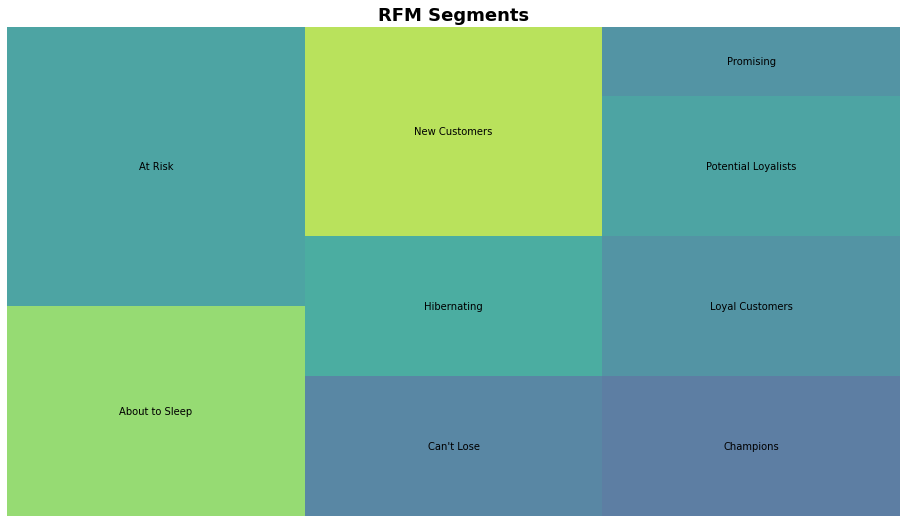

In [84]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_agg['Count'], 
              label=['About to Sleep','At Risk',"Can't Lose",'Champions','Hibernating','Loyal Customers','New Customers','Potential Loyalists','Promising'], alpha=.8 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

### Remark:
3 segments selected for evaluation are "Can't Lose", "Hibernating" and "Champions".

Number of customers for segments:

Can't Lose = 12, Hibernating = 218, Champions = 147

#### Can't Lose Segment;

The last shopping date of the customers is on average 246 days before.
Customers have made an average of 16 purchases.
Customers spent an average of £ 8356.

#### Hibernating Segment;

The last shopping date of the customers is 481 days before average.
Customers made an average of 1 purchases.
Customers spent an average of £ 438.

#### Champions Segment;

The last shopping date of the customers is 30 days before average.
Customers made an average of 19 purchases.
Customers spent an average of £ 10796.

#### Can't Lose Segment;

Customers in this segment have not recently made a purchase. For this reason, we need to prepare a discount and gift campaign for this segment. These customers made a large number of purchases when they made purchases before. However, recency values are lower than they should be. The campaign to be implemented for these customers should include both items purchased and recommendations based on previous activities. New and popular products associated with the products that they were interested in can also be included in this campaign. Situations that will cause these customers to stop buying need to be investigated.

#### Hibernating Segment;

Customers in this segment have not made a purchase for a long time. However, by offering discounts, they may be attracted to another purchase.

#### Champions Segment;

Customers in this segment are responsible for most of the revenue. Campaigns should be implemented to ensure the continuity of the shopping of these customers.